# Data Project Pitch

### Σύνοψη 

Θα πραγματοποιηθεί μια έρευνα για τις εκτάσεις που έχουν καεί στην περιοχή της Αττικής, μέσα απο τα ανοιχτά δεδομένα που υπάρχουν στον ιστότοπο του πυροσβεστικού σώματος Ελλάδος. Τα αρχεία αυτά περιλαμβάνουν κατηγορίες συνόλων δεδομένων που διατίθενται και σε ανοιχτό μηχαναγνώσιμο μορφότυπο. Θα αναλυθούν τα δεδομένα που αφορούν τα δασικά συμβάντα, στα οποία επεμβαίνει το Πυροσβεστικό Σώμα. Ο υπερσύνδεσμος, που περιλαμβάνει τα σχετικά αρχεία τύπου (xls), που σε αυτά θα γίνει scraping είναι ο ακόλουθος: https://www.fireservice.gr/el/synola-dedomenon

### Έμπνευση

- Η έμπνευση προέρχεται απο τις εμπειρίες των μελών της ομάδας, τις οποίες αποκόμισαν απο τις φωτιές στην περιοχή των Θρακομακεδόνων το καλοκαίρι του 2022.
- Θα προσπαθήσουμε να δημιουργήσουμε έναν αντίστοιχο χάρτη,
με αυτόν του υπερσυνδέσμου του Υπουργείου Πολιτικής Προστασίας, 
που θα απεικονίζει την συχνότητα των περιοχών που έχουν καεί και όχι τον κίνδυνο φωτιάς:
https://www.civilprotection.gr/el/%CE%B7%CE%BC%CE%B5%CF%81%CE%AE%CF%83%CE%B9%CE%BF%CF%82-%CF%87%CE%AC%CF%81%CF%84%CE%B7%CF%82-%CF%80%CF%81%CF%8C%CE%B2%CE%BB%CE%B5%CF%88%CE%B7%CF%82-%CE%BA%CE%B9%CE%BD%CE%B4%CF%8D%CE%BD%CE%BF%CF%85-%CF%80%CF%85%CF%81%CE%BA%CE%B1%CE%B3%CE%B9%CE%AC%CF%82-01082008
Διαφορετικά θα θέλαμε να κάνουμε κάτι πιο σύνθετο όπως land.copernicus:
https://land.copernicus.eu/pan-european/corine-land-cover/clc-2006/#

### Περαιτέρω πληροφορίες για το θέμα σας

- <b>Τίτλος εργασίας</b>:<br>
Fire data in Attica since 2000<br>
Μελέτη περίπτωσης όσον αφορά τις δασικές πυρκαγίες στην Αττική απο το 2000 έως το 2021 με παραμέτρους μελέτης 
<br><br>
- <b>Δεδομένα</b>: <i> https://www.fireservice.gr/el/synola-dedomenon</i>
<br><br>
- <b>Πιθανά προβλήματα/ανασφάλειες/απορίες</b>:

## Ερευνητικά ερωτήματα

### Τα ερευνητικά ερωτήματα που υπάρχουν είναι τα εξής:<br>

#### 1)	 Συχνότητα που καιγονται περιοχές (πόσες φορές έχουν καεί συγκεκριμένες περιοχές) <br>


##### Εισαγωγή βιβλιοθηκών

In [1]:
import requests # for downloading html pages 
from bs4 import BeautifulSoup # or scraping 
from urllib3.exceptions import InsecureRequestWarning # for handling warnings in web pages
from urllib3 import disable_warnings # for disabling warnings in web pages
from urllib.request import urlopen, urlretrieve # for opening and retrieving urls
import pandas as pd # for creating dataframes
import re # for regular expressions
import time # for creating time objects
import numpy as np # for mathematical computations
import datetime # for date computations

##### Κατέβασμα αρχείων δεδομένων

In [2]:
disable_warnings(InsecureRequestWarning) # disabling warnings because the site is overly secured

page = requests.get('https://www.fireservice.gr/el/synola-dedomenon', verify=False) # verify = False (not using SSL verification)

html = BeautifulSoup(page.text, 'html.parser') # saving the html of the page in the "html" variable

In [3]:
pattern = re.compile('Δασικές Πυρκαγιές \d{4}-?\d?\d?\d?\d?') # regular expression patterns of the links we want
pattern2 = re.compile('\d{4}-?\d?\d?\d?\d?') # second regular expression patterns for the links we want 
spans = html.find_all('span') # finding all the spans in the html file 
texts = [i.text for i in spans] # getting the texts from all the spans

idxs = [] 
for i in range(len(texts)): # i goes through the number of texts that exist in all the spans
  if re.match(pattern, texts[i]): # if the text in the span matches the pattern then we want the span 
    idxs.append(i) # adding the indexes that correspond to the spans we want 

# getting the spans with the links we want 
wanted_spans = []
for i in idxs: # running through the indexes we found above
  wanted_spans.append(spans[i]) # adding the spans in the wanted_spans list

wanted_texts = [i.text for i in wanted_spans] # getting the text in the list from the wanted_spans
filenames = [] # will contain the names of the files (i.e. the years)
for i in wanted_texts: # going through the wanded texts 
  matches = pattern2.finditer(i) # creating iterator that goes through all the matches of the second pattern
  for j in matches: # running through the iterator
    filenames.append(j.group()) # getting the text of the first group which is the whole pattern that was found and adding it to the filenames list
filenames = list(dict.fromkeys(filenames)) # removing duplicates

xlsx_urls = []
# getting the urls of xlsx files 
for span in wanted_spans: # running through the spans in wanted_spans
  xlsx_urls.append(span.find_all('a')[1]['href']) # adding all the hrefs that are found in the a tags that belong in the wanted_spans

xlsx_urls = list(dict.fromkeys(xlsx_urls)) # removing duplicates
base_string = 'https://www.fireservice.gr/' # the urls lack the base string 

# adding the base string 
for i in range(len(xlsx_urls)):
  xlsx_urls[i] = 'https://www.fireservice.gr/' + xlsx_urls[i]


c = 0 # creating a counter that starts from 0
for doc in xlsx_urls: # running all the urls that were gathered previously in the xlsx_urls list
  time.sleep(2) # sleeping for two seconds so that the server does not get overloaded with requests
  response = requests.get(doc, allow_redirects=True, verify=False) # getting the document inside the url
  f = open(str(filenames[c])+".xlsx", 'wb') # creating a file of the type .xlsx to write the documents
  c += 1 # adding one to the filenames list so that the next document will have the next name 
  f.write(response.content) # writing the content of the document in the file that was created above
  f.close() # closing the file 


##### Εξερεύνηση δεδομένων

In [4]:
# the files had no column names but the column names were in the first row so we change that
# this function renames the columns of the dataframes that were created 
def col_rename(df): 
  new = list(df.iloc[0,:].to_numpy()) # taking the first row and putting its content into a list
  old = list(df.columns) # taking the column names and putting them in a list 

  change = {o : n for (o, n) in zip(old, new)} # creating a dictionary with keys the old names and values the new names
  df = df.rename( columns = change) # using the pandas method rename to change the names 
  df = df.iloc[1:,:] # dropping the first row which has the names of the dataset (so that we don't have the names twice)
  return df # returning the dataframe 



In [5]:
# initializing dataframes using the read_excel method of pandas
df_00_12 = pd.read_excel('2000-2012.xlsx')
df_13 = pd.read_excel('2013.xlsx')
df_14 = pd.read_excel('2014.xlsx')
df_15 = pd.read_excel('2015.xlsx')
df_16 = pd.read_excel('2016.xlsx')
df_17 = pd.read_excel('2017.xlsx')
df_18 = pd.read_excel('2018.xlsx')
df_19 = pd.read_excel('2019.xlsx')
df_20 = pd.read_excel('2020.xlsx')
df_21 = pd.read_excel('2021.xlsx')


In [6]:
# changing the column names of some problematic datasets using the function we created above
df_00_12 = col_rename(df_00_12)
df_13 = col_rename(df_13)
df_15 = col_rename(df_15)
df_16 = col_rename(df_16)
df_17 = col_rename(df_17)
df_18 = col_rename(df_18)
df_19 = col_rename(df_19)
df_20 = col_rename(df_20)
df_21 = col_rename(df_21)


In [7]:
df_00_12.rename( columns = {'Περιοχή - Τοποθεσία' : 'Περιοχή'}, inplace=True) # renaming columns 
# just so that every dataset has the same name 

In [186]:
# Gathering all dataframes into one
df = df_00_12.append(
    df_13.append(
    df_14.append(
    df_15.append(
    df_16.append(
    df_17.append(
    df_18.append(
    df_19.append(
    df_20.append(
    df_21
    )))))))))

# filtering the dataframes to return only information on Attica
df_attiki = df[df['Νομός'] == 'ΑΤΤΙΚΗΣ'] 
# removing dupplicates based on date so that we don't add more than they truly are 
df_attiki_unique = df_attiki.drop_duplicates(subset=['Ημερ/νία Έναρξης'])
# keeping only the location feature and dropping all nan values
location = df_attiki_unique['Περιοχή'].dropna()


,Υπηρεσία,Δασαρχείο,Περιοχή,Νομός,Ημερ/νία Έναρξης,Ώρα Έναρξης,Ημερ/νία Κατασβεσης,Ώρα Κατάσβεσης,Δάση,Δασική Έκταση,...,Α/Φ CL415,Α/Φ CL215,Α/Φ PZL,Α/Φ GRU.,Α/Α ΕΓΓΡΑΦΗΣ,Α/Α ENGAGE,X-ENGAGE,Y-ENGAGE,ΜΙΣΘ. ΕΛΙΚΟΠΤ.,ΜΙΣΘ. ΑΕΡΟΣΚ.
1,Π.Κ. ΑΧΑΡΝΩΝ - Δ.Π.Υ.ΑΘΗΝΑΣ,ΠΕΝΤΕΛΗΣ,ΚΡΥΟΝΕΡΙ,ΑΤΤΙΚΗΣ,2000-06-08 00:00:00,13:30:00,2000-06-08 00:00:00,15:00:00,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Π.Κ. ΠΟΛΥΔΕΝΔΡΙΟΥ,ΚΑΠΑΝΔΡΙΤΙΟΥ,ΑΓΡ.ΠΕΡ.ΑΦΙΔΝΩΝ,ΑΤΤΙΚΗΣ,2000-06-05 00:00:00,11:44:00,2000-06-05 00:00:00,13:00:00,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1ος Π.Σ. ΑΘΗΝΩΝ,ΠΕΝΤΕΛΗΣ,ΚΑΡΕΑΣ,ΑΤΤΙΚΗΣ,2000-06-14 00:00:00,10:25:00,2000-06-14 00:00:00,14:00:00,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1ος Π.Σ. ΑΘΗΝΩΝ,ΠΕΝΤΕΛΗΣ,ΝΕΚΡΟΤΑΦΕΙΟ ΚΑΙΣΑΡΙΑΝΗΣ,ΑΤΤΙΚΗΣ,2000-07-23 00:00:00,11:10:00,2000-07-23 00:00:00,13:16:00,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2ος Π.Σ. ΑΘΗΝΩΝ,ΠΑΡΝΗΘΟΣ,ΔΡΟΣΟΠΟΥΛΟΥ ΑΝΩ ΛΙΟΣΙΑ,ΑΤΤΙΚΗΣ,2000-10-04 00:00:00,14:40:00,2000-10-04 00:00:00,17:20:00,8,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6934,ΕΘ.Π.Κ. ΥΔΡΑΣ,NaN,ΜΕΘΑΝΑ,ΑΤΤΙΚΗΣ,2021-08-14 00:00:00,18:05,NaN,NaN,0,0,...,0,0,0,0,1689722,883062,23.491201,37.354126,0,2
6935,ΕΘ.Π.Κ. ΥΔΡΑΣ,NaN,NaN,ΑΤΤΙΚΗΣ,2021-12-10 00:00:00,17:35,2021-12-13 00:00:00,12:28,0,0,...,0,0,0,0,1722778,915970,23.491582,37.354818,0,0
6936,ΕΘ.Π.Κ. ΥΔΡΑΣ,NaN,NaN,ΑΤΤΙΚΗΣ,2021-12-30 00:00:00,20:35,NaN,NaN,0,0,...,0,0,0,0,1726993,922069,23.491838,37.35455,NaN,NaN
6937,ΕΘ.Π.Κ.ΠΟΡΟΥ,NaN,NaN,ΑΤΤΙΚΗΣ,2021-04-15 00:00:00,09:49,NaN,NaN,0,0,...,0,0,0,0,1664080,845837,23.471512,37.511112,NaN,NaN


In [9]:
fire_counts = dict(location.value_counts()) # counting how many times an area had a fire by counting the times of their presence in the data
print('Συχνότητες καμένων περιοχών κατά την περίοδο 2000-2021: \n')
for i in fire_counts.keys():
  if i != '-': # because some fires had not an area name, we have to drop this value 
    print(i, ':', fire_counts[i]) # printing the names of the areas and how many times they got burned


Συχνότητες καμένων περιοχών κατά την περίοδο 2000-2021: 

ΚΕΡΑΤΕΑ : 142
ΜΕΓΑΡΑ : 41
ΑΝΑΒΥΣΣΟΣ : 21
ΛΑΥΡΙΟ : 18
ΑΧΑΡΝΑΙ : 17
ΚΑΠΑΝΔΡΙΤΙ : 16
ΚΑΛΑΜΟΣ : 15
ΠΑΛΙΑ ΦΩΚΑΙΑ : 12
ΒΙΛΙΑ : 11
ΚΡΥΟΝΕΡΙ : 9
ΑΦΙΔΝΕΣ : 8
ΑΣΠΡΟΠΥΡΓΟΣ : 8
ΣΤΑΜΑΤΑ : 8
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ : 7
ΠΕΤΡΟΥΠΟΛΗ : 6
ΑΝΩ ΛΙΟΣΙΑ : 6
ΦΥΛΗ : 6
ΚΑΜΑΤΕΡΟΥ : 6
ΣΑΡΩΝΙΔΑ : 5
ΜΑΡΚΟΠΟΥΛΟ : 5
ΘΡΑΚΟΜΑΚΕΔΟΝΕΣ : 5
ΚΗΦΙΣΙΑ : 4
ΒΑΣΙΛΙΚΑ : 3
ΜΑΓΟΥΛΑ : 3
ΚΟΥΛΟΥΡΙΩΤΙΚΟ ΜΟΝΟΠΑΤΙ : 3
ΠΕΡΑΜΑ : 3
ΠΕΝΤΕΛΗ : 3
ΦΑΝΕΡΩΜΕΝΗ : 3
ΟΙΝΟΗ : 3
ΜΗΤΑΤΑ : 3
ΠΟΛΥΔΕΝΔΡΙ : 3
ΙΚΑΡΙΩΤΙΚΑ ΠΕΡΑΜΑΤΟΣ : 2
ΠΙΚΕΡΜΙ : 2
ΚΟΥΒΑΡΑΣ : 2
ΧΑΙΔΑΡΙ : 2
ΑΓ.ΛΟΥΚΑΣ : 2
ΣΑΛΑΜΙΝΑ : 2
ΛΕΩΦ.ΝΑΤΟ ΑΣΠΡΟΠΥΡΓΟΥ : 2
ΜΑΝΔΡΑ : 2
ΜΕΘΑΝΑ : 2
ΜΑΡΟΥΔΙ ΑΙΑΣ ΚΛΑΜΠ : 1
ΑΓ. ΓΕΩΡΓΙΟΣ ΤΡΟΙΖΗΝΙΑΣ : 1
ΓΑΛΑΤΑΣ-ΔΑΡΙΖΑ : 1
ΔΗΜΟΣ ΤΡΟΙΖΗΝΑΣ : 1
ΓΑΛΑΤΑΣ-ΚΟΚΚΙΝΙΑ ΤΡΟΙΖΗΝΑΣ : 1
ΚΑΤΑΣΚΗΝΩΣΗ ΓΑΛΑΤΑ ΤΡΟΙΖΗΝΑ : 1
ΜΑΡΚΟΠΟΥΛΟ ΩΡΩΠΟΥ : 1
ΤΟΡΟΝΤΟ ΑΜΠΕΛΑΚΙΩΝ : 1
ΠΕΡΙΣΤΕΡΙΑ : 1
ΛΕΩΦ.ΦΑΝΕΡΩΜΕΝΗΣ ΑΓ.ΓΕΩΡΓΙΟΣ : 1
ΑΙΑΝΤΕΙΟ : 1
ΑΓΙΟΣ ΑΝΤΩΝΙΟΣ ΑΜΠΕΛΑΚΙΩΝ : 1
ΘΕΣΗ ΣΤΡΩΜΑ ΥΜΗΤΤΟΥ ΔΑΣΟΜΕΝΗ ΚΟΡΥΦΗ : 1
ΑΜΦΙΑΡΕΙΟ ΚΑΛΑΜΟΥ ΑΤΤΙΚΗΣ : 1
ΠΑΙΑΝΙΑ 

In [73]:
# saving the fires with their unique values for the creation of the map 
df_map = df_attiki_unique.drop_duplicates(subset=['Περιοχή'])
loc_counts_df = pd.DataFrame(location.value_counts()) # creating a dataframe that has the areas and the value counts

# normalizing fire_counts so that the counts represent probability weights, were keys are the areas and the probability weights are the values 
fire_counts_normalized = {i : j for i,j in zip(fire_counts.keys() , list(list(fire_counts.values()) / max(list(fire_counts.values()))))}
df_map.index = range(191) # reindexing the dataframe so that it starts from 0 and doesn't have random indexes
# adding the weights to the dataframe 
for i in list(fire_counts_normalized.keys()): # going through all the names of the areas
  for j in range(len(df_map)): # going through the length of the set of the areas (which means they only show up once)
    if i == df_map.loc[j, "Περιοχή"]: # if the area i is found in the df_map dataframe
      df_map.loc[j, 'intensity'] = fire_counts_normalized[i] # then add it's intensity in a different column called intensity 

df_map.to_excel('fires.xlsx') # extracting the dataframe with the intensity weights in a .xlsx file 

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [78]:
for i in list(fire_counts_normalized.keys()): # going through all the names of the areas
  for j in range(len(loc_counts_df)):
    if i == loc_counts_df.index[j]:
      loc_counts_df.loc[i, 'intensity'] = fire_counts_normalized[i]
      
loc_counts_df.columns = [''] * len(loc_counts_df.columns) # changing the names of the columns to no names 
loc_counts_df = loc_counts_df[np.invert(loc_counts_df.index == '-')] # taking all the areas that don't have the value '-'
loc_counts_df.to_excel('fire_counts.xlsx') # extracting this dataframe into an .xlsx file 

In [12]:
print('Περιοχή με τις περισσότερες φωτιές στο διάστημα της περιόδου 2000-2021 = {}({})'
      .format(max(fire_counts, key=lambda key: fire_counts[key]),  max(list(fire_counts.values())) )) # creating a lamda function that extracts the area that corresponds to the biggest value of the intensity

Περιοχή με τις περισσότερες φωτιές στο διάστημα της περιόδου 2000-2021 = ΚΕΡΑΤΕΑ(142)


#### 2)	Σύνολο καμμένων εκτάσεων <br>


In [13]:
len(fire_counts) # counts the areas that have been burned

190

#### 3)	 Πόσες δασικές και πόσες γεωργικές εκτάσεις και διάφορες άλλες ερωτήσεις <br>


In [14]:
fire_counts = dict(location.value_counts())

In [15]:
print('Περιοχή με τις περισσότερες φωτιές στο διάστημα της περιόδου 2000-2021 = {}({})'
      .format(max(fire_counts, key=lambda key: fire_counts[key]),  max(list(fire_counts.values())) ))

Περιοχή με τις περισσότερες φωτιές στο διάστημα της περιόδου 2000-2021 = ΚΕΡΑΤΕΑ(142)


In [16]:
print('Συνολικός αριθμός πυρκαγιών στην Ελλάδα : {}'.format( len(df.drop_duplicates(subset='Ημερ/νία Έναρξης'))))

Συνολικός αριθμός πυρκαγιών στην Ελλάδα : 3556


In [17]:
print('Συνολικός αριθμός πυρκαγιών στην Αττική : {}'.format( len(df_attiki.drop_duplicates(subset='Ημερ/νία Έναρξης'))))

Συνολικός αριθμός πυρκαγιών στην Αττική : 1247


In [18]:
print('Συνολικός αριθμός καμμένων στρεμμάτων δασών στην Αττική : {}'.format(round(df_attiki_unique['Δασική Έκταση'].sum())))

Συνολικός αριθμός καμμένων στρεμμάτων δασών στην Αττική : 127952


In [19]:
print('Συνολικός αριθμός καμμένων στρεμμάτων γεωργικών εκτάσεων στην Αττική : {}'.format(round(df_attiki_unique['Γεωργικές Εκτάσεις'].sum())))

Συνολικός αριθμός καμμένων στρεμμάτων γεωργικών εκτάσεων στην Αττική : 46486


In [20]:
print('Συνολικός αριθμός καμμένων δασών : {}'.format(len(df_attiki_unique[df_attiki_unique['Δασική Έκταση'] == 0])))

Συνολικός αριθμός καμμένων δασών : 773


In [21]:
print('Συνολικός αριθμός καμμένων γεωργικών εκτάσεων : {}'.format(len(df_attiki_unique[df_attiki_unique['Γεωργικές Εκτάσεις'] == 0])))

Συνολικός αριθμός καμμένων γεωργικών εκτάσεων : 970


In [144]:

first = list(df_attiki['Σκουπιδότοποι'].dropna().to_numpy())
second = list(df_attiki['Σκουπι-δότοποι'].dropna().to_numpy())

skoup = first + second
df_attiki['Σκουπιδότοποι'] = skoup

<ipython-input-144-5e21532a2f38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attiki['Σκουπιδότοποι'] = skoup


In [166]:
lands = df_attiki[['Άλση', 'Σκουπιδότοποι', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις','Χορτ/κές Εκτάσεις','Υπολλείματα Καλλιεργειών'
,'Δάση', 'Δασική Έκταση' ]]

types = ['Άλση', 'Σκουπιδότοποι', 'Καλάμια - Βάλτοι', 'Γεωργικές Εκτάσεις','Χορτ/κές Εκτάσεις','Υπολλείματα Καλλιεργειών','Δάση', 'Δασική Έκταση' ]
for t in types:
  lands[t] = lands[t].astype(float)

lands = lands.apply(lambda x: np.where(x>0, 1, x))



<ipython-input-166-2e9bda8c04c3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lands[t] = lands[t].astype(float)


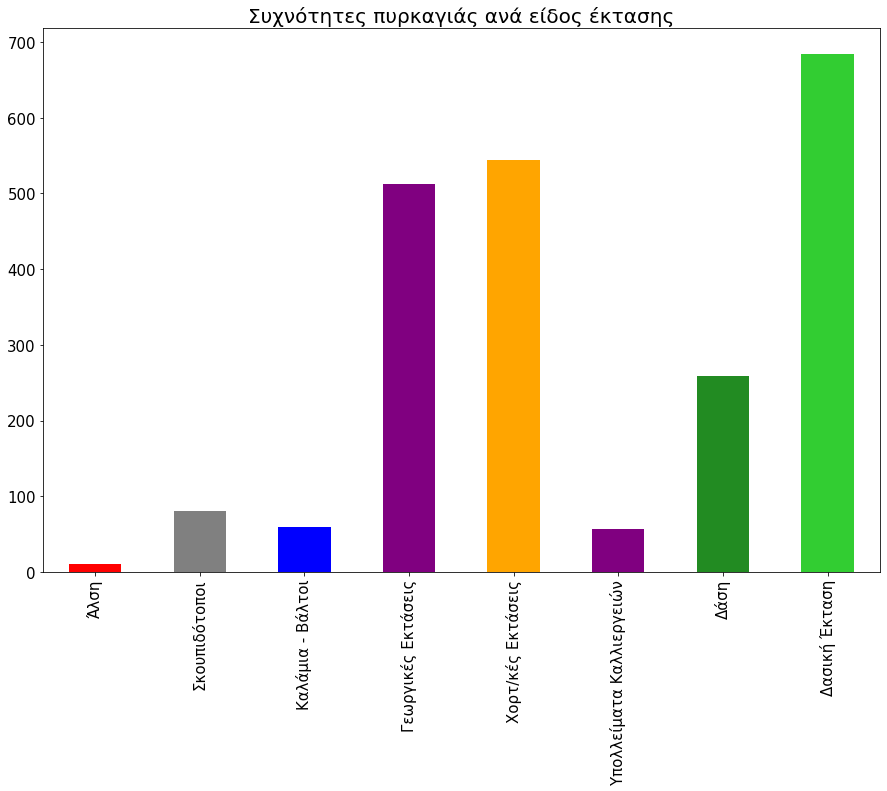

In [179]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


colors = ["red", "gray", "blue", "purple", "orange", "purple", "forestgreen", "limegreen"]
lands.sum().plot(kind='bar', color=colors)
plt.title('Συχνότητες πυρκαγιάς ανά είδος έκτασης', fontsize=20)
plt.savefig('landhist.png', bbox_inches='tight')

#### 4)	Χρόνος κατάσβεσης<br>

In [196]:
# getting a dataframe that has only the listed values and dropping the nan values
fire_time = df_attiki[['Περιοχή','Ημερ/νία Έναρξης', 'Ημερ/νία Κατασβεσης', 'Ώρα Έναρξης', 'Ώρα Κατάσβεσης']].dropna()

fire_time.reset_index(drop=True, inplace=True)


In [197]:
# correcting the start time and making it a time object so that we can perform time additions and subtractions
for i in range(len(fire_time.iloc[:,3])):
  fire_time.iloc[i, 3] = pd.to_datetime(str(fire_time.iloc[i, 3])).time()

In [198]:
for i in range(len(fire_time.iloc[:,4])):
  fire_time.iloc[i, 4] = pd.to_datetime(str(fire_time.iloc[i, 4])).time() # doing the same as above


In [201]:

for i in range(len(fire_time)): # i is going through the length of the data frame 
  try:

    start = datetime.datetime.combine(pd.to_datetime(fire_time.iloc[i,1]), fire_time.iloc[i,3]) # combining the start date and time
    end = datetime.datetime.combine(pd.to_datetime(fire_time.iloc[i,2]), fire_time.iloc[i,4]) # combining the end date and time
    time_elapsed = end - start # finding the differene

    if time_elapsed.total_seconds() > 0 or np.invert(np.isnan(time_elapsed.total_seconds)):
      fire_time.loc[i,'Χρόνος κατάσβεσης(ώρες)'] = round(time_elapsed.total_seconds()/60/60,2)

  except: # if an error is thrown, move to the next iteration 
      continue

fire_time = fire_time.dropna() # dropping any nan values

In [218]:
fire_time = fire_time[fire_time.iloc[:,5] < 500]

In [103]:
fire_time.to_excel('fire_time.xlsx') # extracting the dataframe that was created

In [226]:
xticks = np.sort([i.strftime('%Y-%m-%d') for i in fire_time.iloc[:,2].to_numpy()])

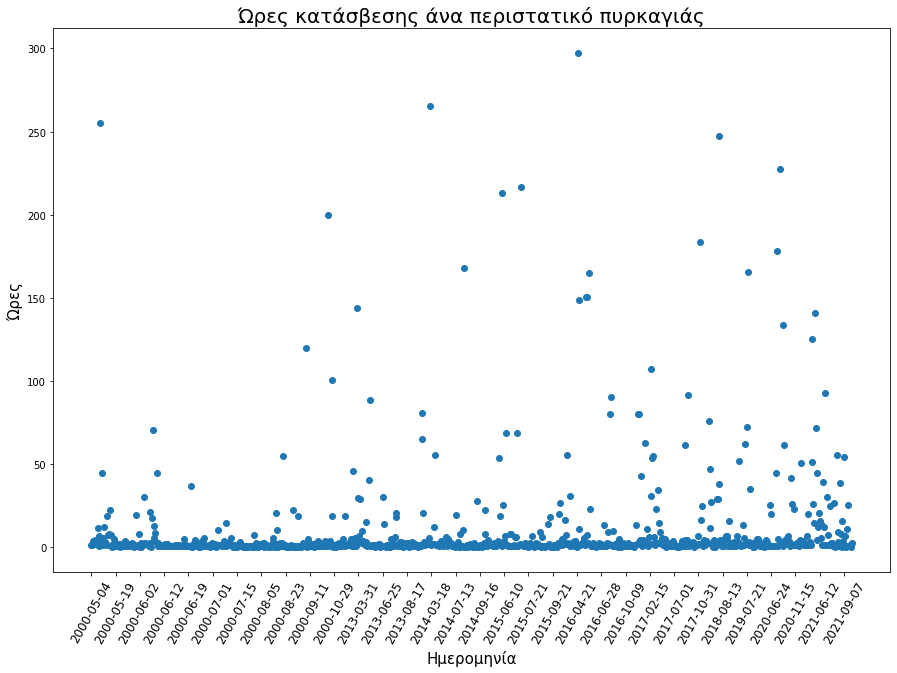

In [228]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
y = fire_time.iloc[:, 5]
x = [i for i in range(len(fire_time))]
plt.title('Ώρες κατάσβεσης άνα περιστατικό πυρκαγιάς', fontsize=20)
plt.xticks(x[::30], xticks[::30], rotation=60, fontsize=12)
plt.xlabel('Ημερομηνία', fontsize=15)
plt.ylabel('Ώρες', fontsize=15)

plt.scatter(x, y)
plt.savefig('extinguish_time.png', bbox_inches='tight')
plt.show()

## Προέρευνα/δουλειά που έχετε ήδη κάνει στο πλαίσιο του σχεδιασμού του πρότζεκτ

Η προεργασία, που κάναμε αφορούσε την έρευση ενός θέματος για το οποίο υπήρχαν διαθέσιμες κατηγορίες συνόλων δεδομένων 
που διατίθενται και σε ανοιχτό μηχαναγνώσιμο μορφότυπο. Καταλήξαμε στην επιλογή του θέματος με τις πυρκαγίες, καθώς στον ιστότοπο του ΠΣ Ελλάδας, υπήρχαν τα δεδομένα αυτά. Επιλέξαμε στην συνέχεια τρια με τέσσερα ερευνητικά, που θέλουμε να απαντήσουμε μέσω scraping των αρχείων  xls. Τέλος φτιάξαμε το αρχείο αυτό, που μας ζητήθηκε.

## Απαντήστε "YES" ή "NO" στα παρακάτω ερωτήματα
<i>(Στο στάδιο της πρότασης θέματος που βρίσκεστε, το αναμενόμενο είναι YES. Όσα περισσότερα NO, τόσο λιγότερο έχετε προετοιμαστεί και, άρα, χρειάζεται να σχεδιάσετε καλύτερα το πρότζεκτ σας.)</i>

In [29]:
input("Έχετε ψάξει για πηγές δεδομένων για το θέμα που θέλετε να κάνετε;")   

Έχετε ψάξει για πηγές δεδομένων για το θέμα που θέλετε να κάνετε;yes


'yes'

In [30]:
input("Έχετε βρει δεδομένα/πηγές δεδομένων για το θέμα που θέλετε να κάνετε;" "YES")

Έχετε βρει δεδομένα/πηγές δεδομένων για το θέμα που θέλετε να κάνετε;YESyes


'yes'

In [31]:
input("Έχετε περάσει χρόνο εξερευνώντας τα δεδομένα σας; Έχετε καταλάβει τι έχετε, σε ποια μορφή είναι και ενδεχομένως τι σας λείπει;" "YES")

Έχετε περάσει χρόνο εξερευνώντας τα δεδομένα σας; Έχετε καταλάβει τι έχετε, σε ποια μορφή είναι και ενδεχομένως τι σας λείπει;YESyes


'yes'

In [32]:
input("Έχετε διατυπώσει τα ερευνητικά ερωτήματά σας;" "YES")

Έχετε διατυπώσει τα ερευνητικά ερωτήματά σας;YESyes


'yes'

In [33]:
input("Έχετε σκεφτεί πώς θα αναλύσετε τα δεδομένα σας, για να απαντήσετε τα ερευνητικά ερωτήματά σας;" "YES")

Έχετε σκεφτεί πώς θα αναλύσετε τα δεδομένα σας, για να απαντήσετε τα ερευνητικά ερωτήματά σας;YESyes


'yes'

In [34]:
input("Έχετε αρχίσει να σκέφτεστε πώς θα μπορούσατε να οπτικοποιήσετε τις αναλύσεις σας για το τελικό σας story;" "YES")

Έχετε αρχίσει να σκέφτεστε πώς θα μπορούσατε να οπτικοποιήσετε τις αναλύσεις σας για το τελικό σας story;YESyes


'yes'

In [35]:
input("Έχετε καταθέσει το pitch σας (το προτεινόμενο θέμα σας) σε ένα notebook με filename PITCH_ΟΝΟΜΑΤΕΠΩΝΥΜΟ1_ΟΝΟΜΑΤΕΠΩΝΥΜΟ2;" "ΑΥΤΟ ΕΔΩ ΕΙΝΑΙ")

Έχετε καταθέσει το pitch σας (το προτεινόμενο θέμα σας) σε ένα notebook με filename PITCH_ΟΝΟΜΑΤΕΠΩΝΥΜΟ1_ΟΝΟΜΑΤΕΠΩΝΥΜΟ2;ΑΥΤΟ ΕΔΩ ΕΙΝΑΙyes


'yes'

### Feedback!
Mπράβο για την ιδέα και που έχετε ήδη αρχίσει να σχεδιάζετε το πρότζεκτ σας! 

Προτείνω τα εξής: 
1. Διευκρινίστε εάν θα ασχοληθείτε μόνο με δασικά συμβάντα ή και με αστικά
2. Διευκρινίστε ποιο είναι το χρονικό διάστημα μελέτης
3. Περάστε χρόνο με τα δεδομένα σας: εξερευνήστε τα data για το χρονικό διάστημα που σας ενδιαφέρει και καταλάβετε τι έχετε, τι δεν έχετε και ποιες τυχόν διαφορές υπάρχουν από χρονιά σε χρονιά στα data που παρέχονται
4. Σκεφτείτε τι ακριβώς θα χαρτογραφήσετε: δήμους; περιοχές; ακριβή τοποθεσία συμβάντος; 
5. Με βάση το 4, αρχίστε να σκέφτεστε μια στρατηγική για το πώς θα χειριστείτε τα δεδομένα σας, ώστε να πετύχετε τη χαρτογράφηση που θέλετε

Όσον αφορά στη συλλογή δεδομένων, γράφετε: «Ο υπερσύνδεσμος, που περιλαμβάνει τα σχετικά αρχεία τύπου (xls), που σε αυτά θα γίνει scraping είναι ο ακόλουθος: https://www.fireservice.gr/el/synola-dedomenon». Δεν  χρειάζεται να κάνετε scraping, καθώς τα δεδομένα σας διατίθενται ήδη σε μηχαναγνώσιμο format. Ωστόσο, σας προτείνω να γράψετε έναν μικρό scraper που θα κάνει download τα αρχεία .xls για εξάσκηση :)

Ως προς την προεργασία/προέρευνα: Στο κομμάτι αυτό του pitch, ο σκοπός δεν είναι να κάνουμε μία περίληψη όσων έχουμε ήδη περιγράψει παραπάνω. Σκοπός της προέρευνας είναι να κάνετε μια πρώτη, πολύ πρώιμη ανάλυση που θα σας δώσει ένα πρώτο εύρημα, το οποίο θα χρησιμοποιήσετε για να εξηγήσετε σε κάποιον γιατί αυτό το κομμάτι είναι σημαντικό και γιατί έχει νόημα η περαιτέρω δημοσιογραφική έρευνα.